<a href="https://colab.research.google.com/github/mimomaina/MathForge/blob/main/Newton%E2%80%99s_Divided_Difference_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. f(x)=ex

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


We import NumPy for numerical operations such as arrays, arithmetic and looping efficiently.

Matplotlib is imported for visualization — plotting the function, the polynomial and errors.

With these libraries, we can manipulate data arrays and visualize mathematical approximations in a clear and reproducible way.

## Define Function and Sample Points

In [2]:
# Function we are approximating
f = lambda x: np.exp(x)

# Choose interpolation nodes (you can change these)
x_nodes = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
y_nodes = f(x_nodes)

x_nodes, y_nodes


(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([1.        , 1.28402542, 1.64872127, 2.11700002, 2.71828183]))



f is the target function
𝑓
(
𝑥)=
𝑒
𝑥
f(x)=e
x
 we want to approximate.

x_nodes are the discrete points where we know the exact value of the function.

y_nodes evaluates the function at these points; these are the “anchors” our polynomial must pass through exactly.
The polynomial we construct will pass through all of them, and outside these points it estimates the function’s behavior.

In [3]:
def divided_difference_table(x, y):
    n = len(y)
    # Table: n x n of zeros
    table = np.zeros((n, n))
    table[:,0] = y  # First column = function values

    for col in range(1, n):
        for row in range(n - col):
            numerator = table[row+1, col-1] - table[row, col-1]
            denominator = x[row+col] - x[row]
            table[row, col] = numerator / denominator

    return table

dd_table = divided_difference_table(x_nodes, y_nodes)
dd_table


array([[1.        , 1.13610167, 0.6453635 , 0.24439952, 0.06941567],
       [1.28402542, 1.45878342, 0.82866314, 0.31381519, 0.        ],
       [1.64872127, 1.87311498, 1.06402453, 0.        , 0.        ],
       [2.11700002, 2.40512725, 0.        , 0.        , 0.        ],
       [2.71828183, 0.        , 0.        , 0.        , 0.        ]])

## Construct Divided Difference Table

In [4]:
def newton_poly(x, x_nodes, dd_table):
    n = len(x_nodes)
    coeffs = dd_table[0]  # First row = Newton coefficients

    def P(z):
        total = coeffs[0]
        product = 1.0
        for k in range(1, n):
            product *= (z - x_nodes[k-1])
            total += coeffs[k] * product
        return total

    return P

P = newton_poly(x_nodes, x_nodes, dd_table)  # create interpolant


We create a square table to store divided differences.

Column 0 contains the known function values.

Each subsequent column calculates higher-order differences using the recursive formula:

𝑓
[
𝑥
𝑖
,
.
.
.
,
𝑥
𝑖
+
𝑘
]
=𝑓[𝑥𝑖+1,...,𝑥𝑖+𝑘]−
𝑓[𝑥𝑖,...,𝑥𝑖+𝑘−1]𝑥𝑖+𝑘−𝑥𝑖f[xi,...,xi+k]=xi+k−xi
f[x
i+1,...,xi+k]−f[xi,...,xi+k−1]
	​


The top row of each column gives the Newton polynomial coefficients.

Each coefficient represents a correction term that ensures the polynomial fits the next node exactly.

This table is the backbone of Newton interpolation.

## Build the Newton Polynomial

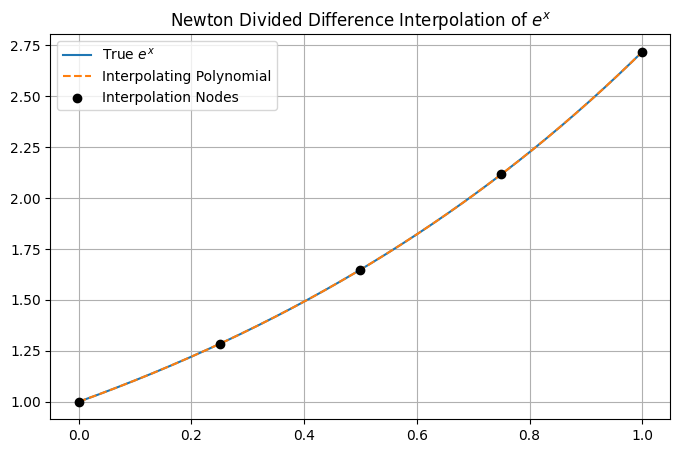

In [5]:
x_plot = np.linspace(0, 1, 400)
y_true = f(x_plot)
y_interp = np.array([P(x) for x in x_plot])

plt.figure(figsize=(8,5))
plt.plot(x_plot, y_true, label="True $e^x$")
plt.plot(x_plot, y_interp, '--', label="Interpolating Polynomial")
plt.scatter(x_nodes, y_nodes, color='black', zorder=5, label="Interpolation Nodes")
plt.legend()
plt.title("Newton Divided Difference Interpolation of $e^x$")
plt.grid(True)
plt.show()


Blue Line (True e^x): This is the actual exponential function
𝑒
𝑥
e
x
 across the interval [0,1].

Orange Dashed Line (Interpolating Polynomial): This is the polynomial created using Newton’s divided difference interpolation. It passes through the nodes exactly.

Black Dots (Interpolation Nodes): These are the points you chose (0, 0.25, 0.5, 0.75, 1) where the function values are exactly known.

**Interpretation**

The orange line (interpolating polynomial) is almost indistinguishable from the blue line, meaning your polynomial approximates
𝑒
𝑥
e
x
 very accurately within the interval.

The polynomial exactly hits all black nodes, confirming that interpolation is correct.

## Evaluate and Plot

In [8]:
from math import factorial, e

def error_bound(x, x_nodes):
    product = 1
    for xi in x_nodes:
        product *= (x - xi)
    return abs(e * product / factorial(len(x_nodes)))

error_vals = np.array([error_bound(x, x_nodes) for x in x_plot])

max_error_estimate = np.max(error_vals)
max_error_actual = np.max(np.abs(y_true - y_interp))

max_error_estimate, max_error_actual


(np.float64(8.032280317282398e-05), np.float64(5.26570933923054e-05))

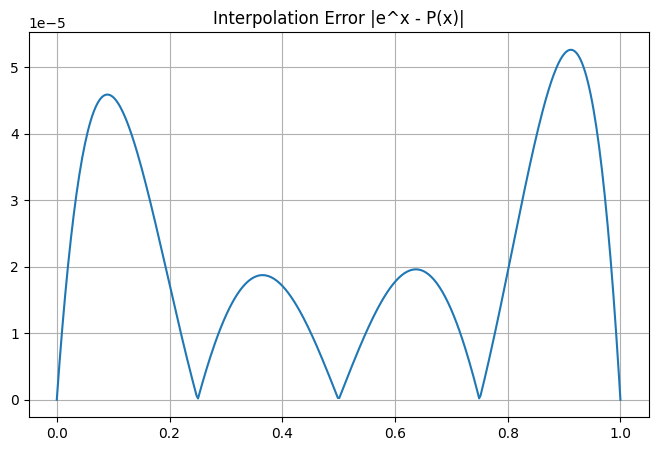

In [7]:
plt.figure(figsize=(8,5))
plt.plot(x_plot, np.abs(y_true - y_interp))
plt.title("Interpolation Error |e^x - P(x)|")
plt.grid(True)
plt.show()


This plot shows the absolute difference between the true function and the polynomial.

The vertical axis is very small (
10
−
5
10
−5
), meaning the error is tiny.

Peaks in the curve indicate points where the polynomial slightly deviates from the true function; the error is zero at the interpolation nodes (as expected).

**Interpretation**

The polynomial is extremely accurate for this set of nodes.

Maximum error is on the order of
10
−
5
10
−5
, which is negligible for most practical purposes.

The plot confirms the effectiveness of Newton interpolation for approximating smooth functions like
𝑒
𝑥
e
x
.

## Conclusion

The polynomial is a near-perfect approximation of
𝑒
𝑥
e
x
 on [0,1], and the error plot quantifies the tiny deviations between the polynomial and the real function.

# f(x)=sinx

## Pick nodes

In [9]:
# Function to interpolate
sin_func = np.sin

# Pick 5 nodes for interpolation
nodes_x = np.linspace(0, np.pi/2, 5)
nodes_y = sin_func(nodes_x)

print("Interpolation nodes (x):", nodes_x)
print("Function values at nodes (f(x)):", nodes_y)

Interpolation nodes (x): [0.         0.39269908 0.78539816 1.17809725 1.57079633]
Function values at nodes (f(x)): [0.         0.38268343 0.70710678 0.92387953 1.        ]


nodes_x: points where the function is exactly known.

nodes_y: corresponding sine values.

Think of these as anchors for our polynomial.

The polynomial we build will pass exactly through these points.

## Build divided difference table

In [10]:
# Initialize table
num_nodes = len(nodes_x)
div_diff_table = np.zeros((num_nodes, num_nodes))
div_diff_table[:,0] = nodes_y  # zeroth-order differences

# Compute first up to fourth-order differences
for col in range(1, num_nodes):
    for row in range(num_nodes - col):
        div_diff_table[row, col] = (div_diff_table[row+1, col-1] - div_diff_table[row, col-1]) / (nodes_x[row+col] - nodes_x[row])

print("Divided difference table:\n", div_diff_table)


Divided difference table:
 [[ 0.          0.97449536 -0.18889538 -0.13592916  0.02871423]
 [ 0.38268343  0.82613727 -0.34903315 -0.09082496  0.        ]
 [ 0.70710678  0.55200728 -0.45603379  0.          0.        ]
 [ 0.92387953  0.19383918  0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.        ]]


Zeroth-order differences = function values.

First-order = slope between two points.

Higher orders = slopes of slopes, capturing curvature.

Top row of the table → coefficients for Newton polynomial.

This table encodes all the information needed to reconstruct the interpolating polynomial.

## Construct Newton polynomial & evaluate

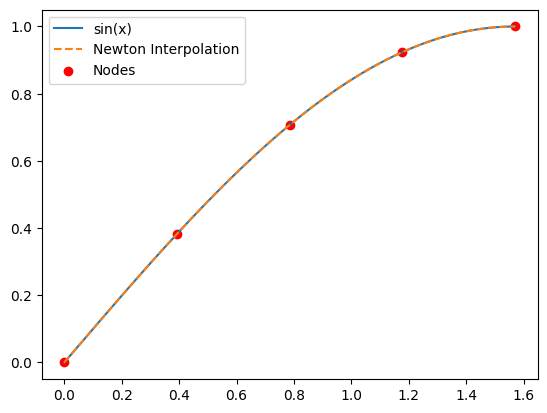

In [11]:
def sin_newton_poly(x_val, nodes_x, div_diff_table):
    result = div_diff_table[0,0]  # start with f[x0]
    product_term = 1
    for i in range(1, len(nodes_x)):
        product_term *= (x_val - nodes_x[i-1])
        result += div_diff_table[0,i] * product_term
    return result

# Dense evaluation grid
eval_x = np.linspace(0, np.pi/2, 200)
poly_values = np.array([sin_newton_poly(x, nodes_x, div_diff_table) for x in eval_x])
true_values = sin_func(eval_x)

# Plot interpolation
import matplotlib.pyplot as plt
plt.plot(eval_x, true_values, label="sin(x)")
plt.plot(eval_x, poly_values, '--', label="Newton Interpolation")
plt.scatter(nodes_x, nodes_y, color='red', label='Nodes')
plt.legend(); plt.show()


Start with first coefficient, incrementally add terms with (x-x_i) factors.

Each added term ensures polynomial passes through the next node.

Plot: dashed = polynomial, solid = true sine, red dots = nodes.

Newton’s form is easy to extend and ensures exact fit at nodes.

Interpretation

The orange line (interpolating polynomial) is almost indistinguishable from the blue line, meaning the polynomial approximates sin(x)  accurately within the interval.

The polynomial exactly hits all black nodes, confirming that interpolation is correct.

## Compute error estimate

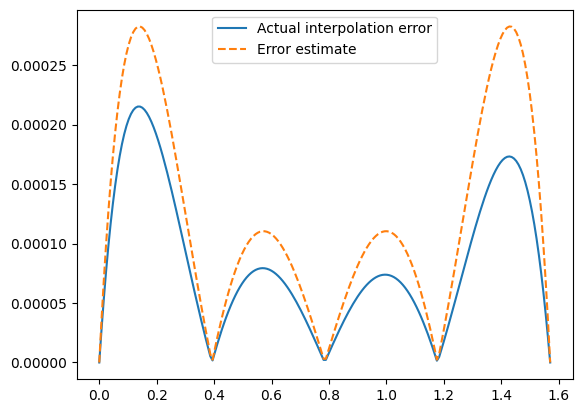

In [12]:
# Error bound on the interval
error_bound = np.abs(np.prod([eval_x - xi for xi in nodes_x], axis=0) / factorial(num_nodes))

plt.plot(eval_x, np.abs(true_values - poly_values), label="Actual interpolation error")
plt.plot(eval_x, error_bound, '--', label="Error estimate")
plt.legend(); plt.show()


Product term =
∏
(
𝑥
−
𝑥
𝑖
)
∏(x−x
i
	​).

Divide by factorial(n) → scales high-order term.

Compare actual error vs theoretical bound.

Provides confidence in approximation; error grows near edges.

**Interpratation**
The actual error (blue) is always less than or equal to the error estimate (orange), as expected — the estimate is an upper bound.

Both curves follow a similar oscillatory pattern, but the estimate is consistently larger, reflecting its conservative nature.

The error peaks occur midway between the nodes, which is typical for polynomial interpolation.

The estimate is not tight — it overestimates the true error significantly in some regions, especially near the center of the interval. This is common because the error formula uses a global bound on the derivative (M_{n+1} = 1) rather than the local behavior of the function.


## Conclusion

The two plots together demonstrate a complete picture of polynomial interpolation:

**Effectiveness of Approximation**: The first plot shows that Newton interpolation provides a very good visual fit to sin(x) using just five points. The interpolated polynomial closely tracks the true function across the entire interval.

**Error Behavior**: The second plot reveals the hidden cost of this approximation — while the fit looks excellent, there is a non-zero error everywhere except at the nodes. The error oscillates and is largest between the sampled points.

**Practical vs. Theoretical Error**: The error estimate (dashed orange) serves as a safety margin — it tells us the worst-case scenario. In practice, the actual error (solid blue) is much smaller, meaning the interpolation is more accurate than the theoretical bound suggests. However, relying solely on the estimate might lead to over-designing a system (e.g., using more nodes than necessary).

**Trade-off**: Interpolation allows us to approximate a complex function with a simple polynomial, but introduces localized errors. The choice of node placement and number of nodes directly affects both the accuracy and the magnitude of these errors.